# PROPERTY PRICE PREDICTION

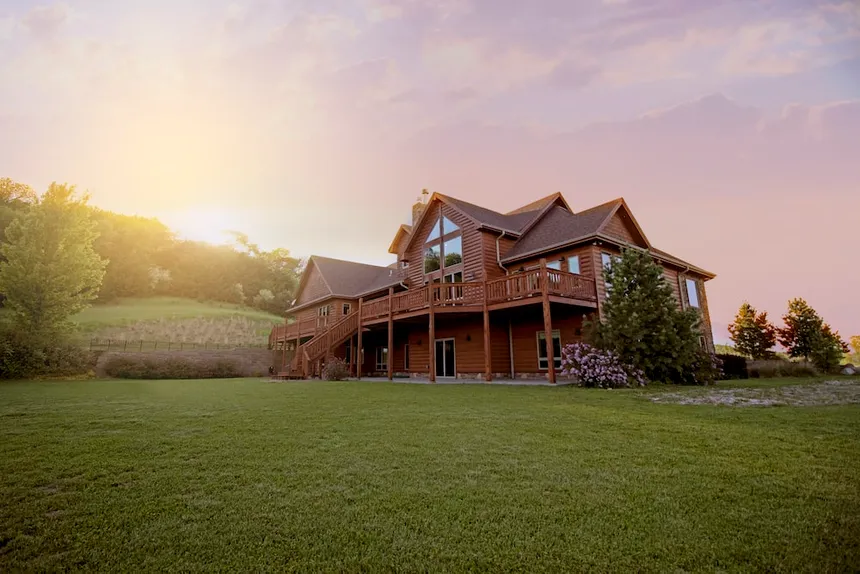

*   **IMPORTING LIBRARIES**
*   **IMPORTING DATASET**
*   **PERFORMING EDA**
*   **DATA SPLIT**
*   **MODEL BUILDING**
*   **EVALUATION**







##IMPORTING LIBRARIES


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##IMPORTING DATASET

In [2]:
dataset=pd.read_csv("/content/HousePrices.csv")

In [3]:
print(dataset.head())

   Id  Dwell_Type Zone_Class  LotFrontage  LotArea Road_Type Alley  \
0   1          60         RL         65.0     8450      Pave   NaN   
1   2          20         RL         80.0     9600      Pave   NaN   
2   3          60         RL         68.0    11250      Pave   NaN   
3   4          70         RL         60.0     9550      Pave   NaN   
4   5          60         RL         84.0    14260      Pave   NaN   

  Property_Shape LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature  \
0            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
1            Reg         Lvl    AllPub  ...        0    NaN   NaN         NaN   
2            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
3            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   
4            IR1         Lvl    AllPub  ...        0    NaN   NaN         NaN   

  MiscVal MoSold YrSold  SaleType  SaleCondition  Property_Sale_Price  
0       0      2   2

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 81 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Alley                129 non-null    object 
 7   Property_Shape       2073 non-null   object 
 8   LandContour          2073 non-null   object 
 9   Utilities            2073 non-null   object 
 10  LotConfig            2073 non-null   object 
 11  LandSlope            2073 non-null   object 
 12  Neighborhood         2073 non-null   object 
 13  Condition1           2073 non-null   object 
 14  Condition2           2073 non-null   object 
 15  Dwelling_Type        2073 non-null   o

##PERFORMING EDA

**TAKING CARE OF NULL VALUES**

In [5]:
dataset.isna().sum()

Id                       0
Dwell_Type               0
Zone_Class               0
LotFrontage            320
LotArea                  0
                      ... 
MoSold                   0
YrSold                   0
SaleType                 0
SaleCondition            0
Property_Sale_Price      0
Length: 81, dtype: int64

In [6]:
dataset.drop(["Alley","PoolQC","Fence","MiscFeature","FireplaceQu"],axis=1,inplace=True)

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          1753 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

In [8]:
dataset["LotFrontage"]=dataset["LotFrontage"].fillna(dataset["LotFrontage"].mean())

In [9]:

dataset=dataset.fillna(dataset.bfill())


In [10]:
dataset["GarageYrBlt"]=dataset["GarageYrBlt"].fillna(dataset["GarageYrBlt"].mean())

In [11]:
dataset["MasVnrArea"]=dataset["MasVnrArea"].fillna(dataset["MasVnrArea"].mean())

In [12]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2073 entries, 0 to 2072
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   2073 non-null   int64  
 1   Dwell_Type           2073 non-null   int64  
 2   Zone_Class           2073 non-null   object 
 3   LotFrontage          2073 non-null   float64
 4   LotArea              2073 non-null   int64  
 5   Road_Type            2073 non-null   object 
 6   Property_Shape       2073 non-null   object 
 7   LandContour          2073 non-null   object 
 8   Utilities            2073 non-null   object 
 9   LotConfig            2073 non-null   object 
 10  LandSlope            2073 non-null   object 
 11  Neighborhood         2073 non-null   object 
 12  Condition1           2073 non-null   object 
 13  Condition2           2073 non-null   object 
 14  Dwelling_Type        2073 non-null   object 
 15  HouseStyle           2073 non-null   o

In [13]:
dataset.isnull().sum()

Id                     0
Dwell_Type             0
Zone_Class             0
LotFrontage            0
LotArea                0
                      ..
MoSold                 0
YrSold                 0
SaleType               0
SaleCondition          0
Property_Sale_Price    0
Length: 76, dtype: int64

<Axes: >

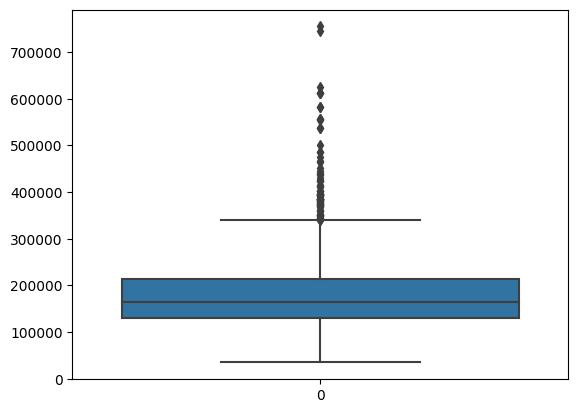

In [14]:
sns.boxplot(dataset["Property_Sale_Price"])

<Axes: >

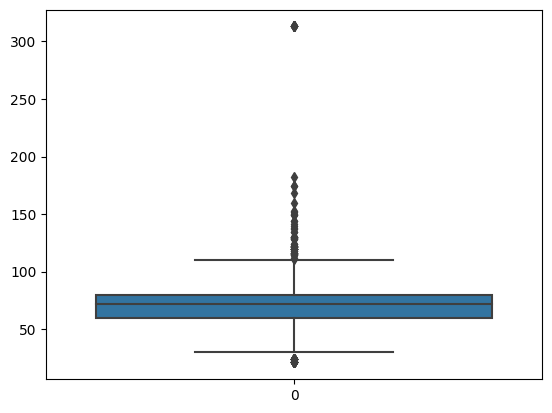

In [15]:
sns.boxplot(dataset["LotFrontage"])

TAKING CARE OF OUTLIERS

In [16]:

q1=dataset["Property_Sale_Price"].quantile(0.25)
q3=dataset["Property_Sale_Price"].quantile(0.75)
iqr=q3-q1
lower_lmt=q1-1.5*iqr
upper_lmt=q3+1.5*iqr
dataset=dataset[((dataset["Property_Sale_Price"]>lower_lmt) & (dataset["Property_Sale_Price"]<upper_lmt))]


In [17]:
q1=dataset["LotFrontage"].quantile(0.25)
q3=dataset["LotFrontage"].quantile(0.75)
iqr=q3-q1
print(q1,q3)
lower_lmt=q1-1.5*iqr
upper_lmt=q3+1.5*iqr
dataset=dataset[((dataset["LotFrontage"]>lower_lmt) & (dataset["LotFrontage"]<upper_lmt))]

60.0 80.0


<Axes: >

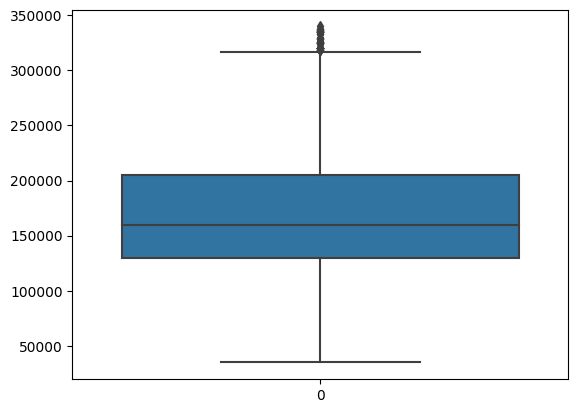

In [18]:
sns.boxplot(dataset["Property_Sale_Price"])

<Axes: >

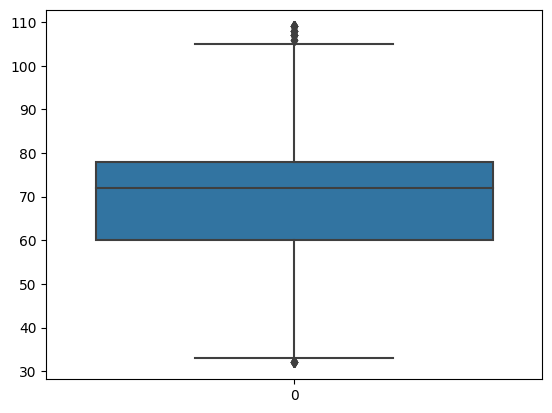

In [19]:
sns.boxplot(dataset["LotFrontage"])

<Axes: >

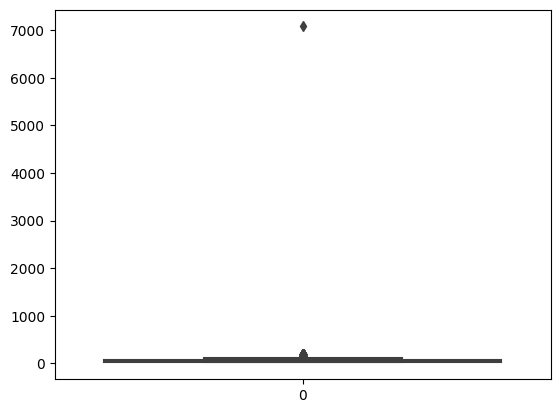

In [20]:
sns.boxplot(dataset["Dwell_Type"])

In [21]:
q1=dataset["Dwell_Type"].quantile(0.25)
q3=dataset["Dwell_Type"].quantile(0.75)
iqr=q3-q1
print(q1,q3)
lower_lmt=q1-1.5*iqr
upper_lmt=q3+1.5*iqr
dataset=dataset[((dataset["Dwell_Type"]>lower_lmt) & (dataset["Dwell_Type"]<upper_lmt))]

20.0 70.0


<Axes: >

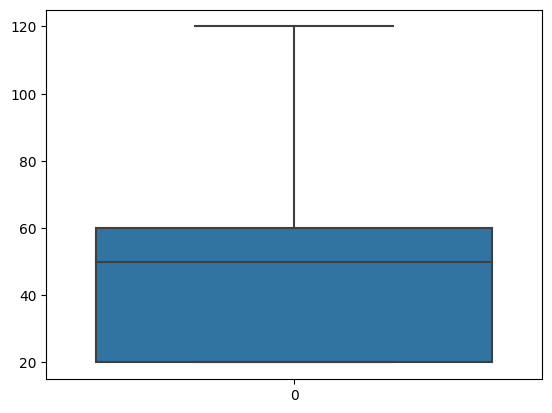

In [22]:
sns.boxplot(dataset["Dwell_Type"])

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1764 entries, 0 to 2072
Data columns (total 76 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Id                   1764 non-null   int64  
 1   Dwell_Type           1764 non-null   int64  
 2   Zone_Class           1764 non-null   object 
 3   LotFrontage          1764 non-null   float64
 4   LotArea              1764 non-null   int64  
 5   Road_Type            1764 non-null   object 
 6   Property_Shape       1764 non-null   object 
 7   LandContour          1764 non-null   object 
 8   Utilities            1764 non-null   object 
 9   LotConfig            1764 non-null   object 
 10  LandSlope            1764 non-null   object 
 11  Neighborhood         1764 non-null   object 
 12  Condition1           1764 non-null   object 
 13  Condition2           1764 non-null   object 
 14  Dwelling_Type        1764 non-null   object 
 15  HouseStyle           1764 non-null   o

<ipython-input-24-0b551b46a368>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(dataset["Property_Sale_Price"])


<Axes: xlabel='Property_Sale_Price', ylabel='Density'>

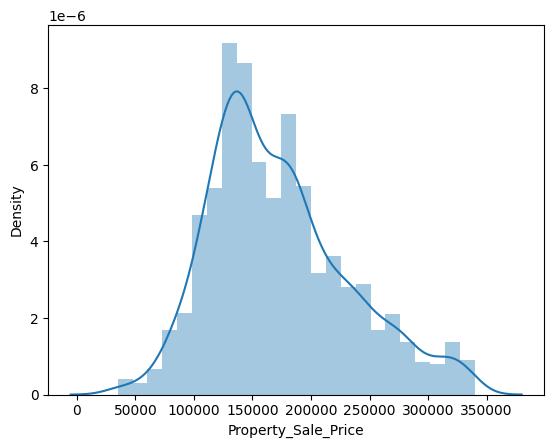

In [24]:
sns.distplot(dataset["Property_Sale_Price"])

ENCODING

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
def encode(data,columns):
  for column in columns:
    data[column]=le.fit_transform(data[column])
  return data

In [ ]:
columns=dataset.select_dtypes(include ='object')
encode(dataset,columns)

,Id,Dwell_Type,Zone_Class,LotFrontage,LotArea,Road_Type,Property_Shape,LandContour,Utilities,LotConfig,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,Property_Sale_Price
0,1,60,3,65.000000,8450,1,3,3,0,4,...,0,0,0,0,0,2,2008,8,4,208500
1,2,20,3,80.000000,9600,1,3,3,0,2,...,0,0,0,0,0,5,2007,8,4,181500
2,3,60,3,68.000000,11250,1,0,3,0,4,...,0,0,0,0,0,9,2008,8,4,223500
3,4,70,3,60.000000,9550,1,0,3,0,0,...,272,0,0,0,0,2,2006,8,0,140000
4,5,60,3,84.000000,14260,1,0,3,0,2,...,0,0,0,0,0,12,2008,8,4,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2067,941,20,3,55.000000,12640,1,0,3,0,4,...,0,0,0,0,0,7,2006,8,4,150900
2068,942,60,3,72.056475,8755,1,0,3,0,2,...,0,168,0,0,0,6,2009,8,4,214000
2069,943,90,3,63.000000,7711,1,0,3,0,4,...,0,0,0,0,0,8,2007,7,0,150000
2071,945,20,3,52.000000,14375,1,0,3,1,1,...,0,0,233,0,0,1,2009,0,0,137500


##SPLITTING THE DATASET

In [ ]:
x=dataset.iloc[:,:-1].values
y=dataset.iloc[:,-1].values

In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=2)

In [ ]:
print(x_train)

[[5.500e+02 6.000e+01 1.000e+00 ... 2.009e+03 8.000e+00 4.000e+00]
 [9.270e+02 6.000e+01 3.000e+00 ... 2.007e+03 8.000e+00 4.000e+00]
 [2.150e+02 6.000e+01 3.000e+00 ... 2.010e+03 8.000e+00 4.000e+00]
 ...
 [5.950e+02 2.000e+01 3.000e+00 ... 2.008e+03 8.000e+00 4.000e+00]
 [6.350e+02 9.000e+01 3.000e+00 ... 2.010e+03 8.000e+00 4.000e+00]
 [1.428e+03 5.000e+01 3.000e+00 ... 2.008e+03 8.000e+00 4.000e+00]]


In [ ]:
print(y_train)

[263000 285000 161750 ... 110000 144000 140000]


##APPLYING LINEAR REGRESSION

In [ ]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [ ]:
y_pred=lr.predict(x_test)
print(y_pred)

[118050.60708233 157907.44647666 254568.80743004 144510.68442715
 215247.06860996 195360.41779086 132708.49497952 121323.60476299
  85602.230136   295725.17350094 136527.91718789 206751.58000011
 117952.3391129  104730.44968341 277947.32614042 214970.6825228
  61184.32287502 121177.82911607 179385.18747114 213015.13815325
  63711.48402879 144238.08399552 232208.10261121 208395.70455046
 294283.97053778 145763.64425391 124507.24721188 158883.70450614
 110748.33619006 132249.7772968  145680.67712463 270144.07768134
 115492.31503988 116349.18377599 232294.63764234 188938.83676066
 162810.49481524 143375.96806206 182354.95525767 282803.51689439
 102489.62527943 206697.64933761 109899.25816194 121734.95908572
  66862.75266838  98925.39799535  80479.38401395 130076.03295428
 136895.13939332 199326.14794236 129607.80943258 203001.97461598
 195469.35413993 220861.89775717 126902.54201762 172563.49555783
 129111.70295584 232297.64493031 104584.42680584 134768.65433651
 164887.88450731 143083.96

##EVALUATION

In [ ]:
from sklearn.metrics import r2_score
print(r2_score(y_test,y_pred))

0.8491511480931883
